## Diwali Sales Analysis
#### Objective:
1: Improve customer experience by analyzing sales data.


2: Increase revenue.

In [ ]:
!pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Diwali Sales Data.csv', encoding ='unicode_escape') #used 'encoding='unicode_escape'' to avoide encoding error

In [7]:
df.shape  #give number of rows and columns

(11251, 15)

In [8]:
df.head(8) #give first 8 rows

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.0,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.0,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [10]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)   #drop/delete unwanted columns

In [13]:
pd.isnull(df).sum()  #to check null values

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [15]:
df.dropna(inplace = True) #it will delete those rows which has null values

In [17]:
df.shape

(11239, 13)

In [21]:
df['Amount'] = df['Amount'].astype('int') #change the datatype, used "df['Amount'] = df['Amount']" to skip use of inplace=True

In [22]:
df['Amount'].dtypes

dtype('int64')

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [24]:
df.rename(columns={'Marital_Status':'Shaadi'})  #rename column, it will not save bcos not use of inplace

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [25]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [26]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### EDA (Exploratory Data Analysis)

#### 1:Gender

In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

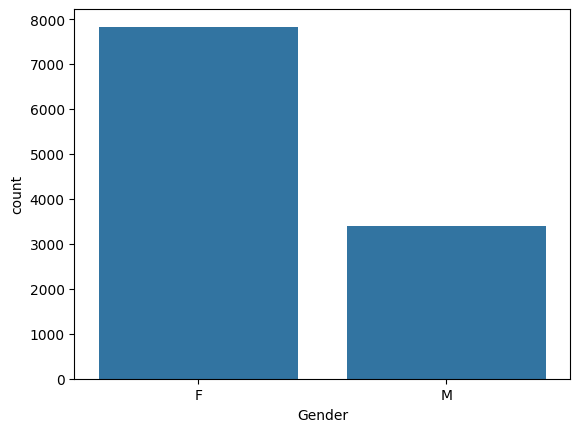

In [28]:
sns.countplot(x='Gender',data=df)

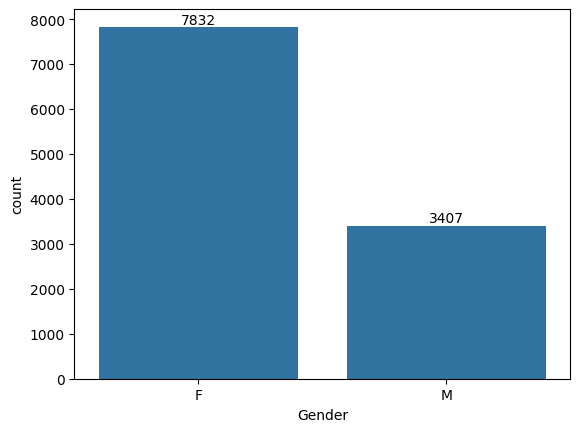

In [30]:
a=sns.countplot(x='Gender', data = df)
for bars in a.containers:
    a.bar_label(bars)

In [31]:
df.groupby(["Gender"], as_index = False)['Amount'].sum().sort_values(by="Amount", ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


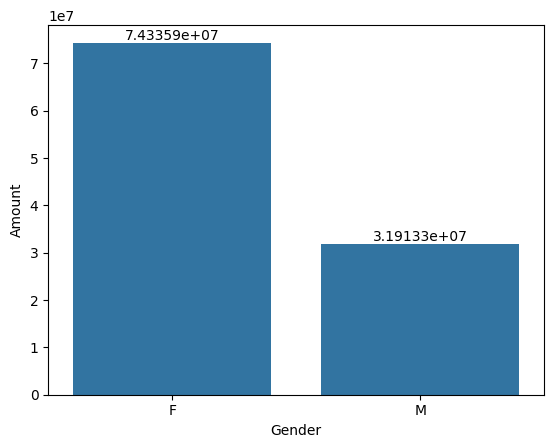

In [38]:
sales = df.groupby(["Gender"], as_index = False)['Amount'].sum().sort_values(by="Amount", ascending = False)
c=sns.barplot(x='Gender',y='Amount', data = sales)
for bars in c.containers:
    c.bar_label(bars)

#### 2: Age Group

In [35]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Age Group', ylabel='count'>

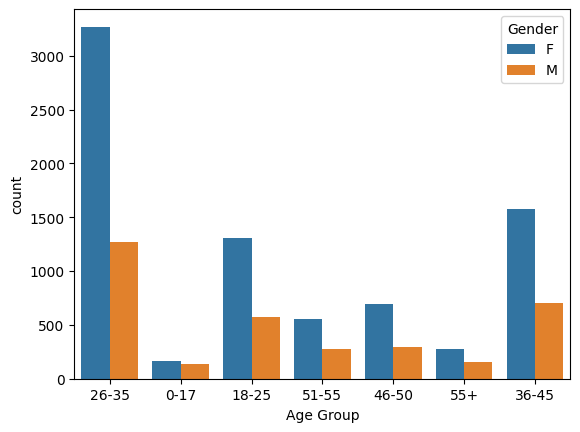

In [36]:
sns.countplot(data=df, x= 'Age Group',hue='Gender')

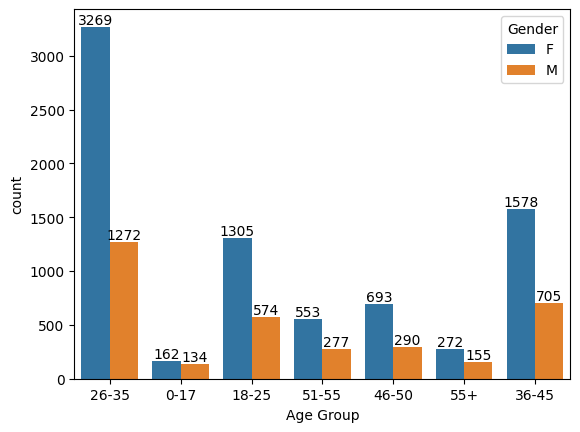

In [37]:
b=sns.countplot(data=df, x= 'Age Group',hue='Gender')
for bars in b.containers:
    b.bar_label(bars)

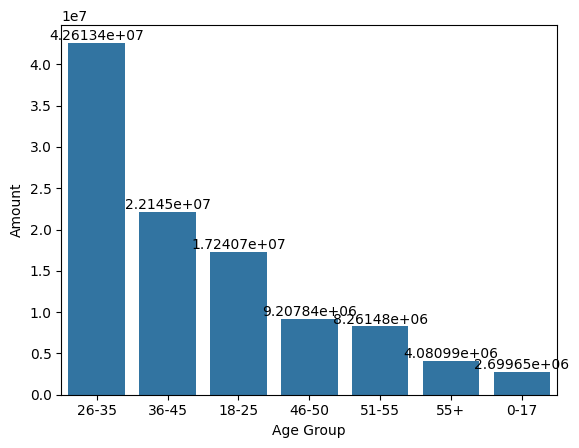

In [43]:
sales2 = df.groupby(["Age Group"], as_index = False)['Amount'].sum().sort_values(by="Amount", ascending = False)
d=sns.barplot(x='Age Group',y='Amount',  data = sales2)
for bars in d.containers:
    d.bar_label(bars)

#### State

In [44]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

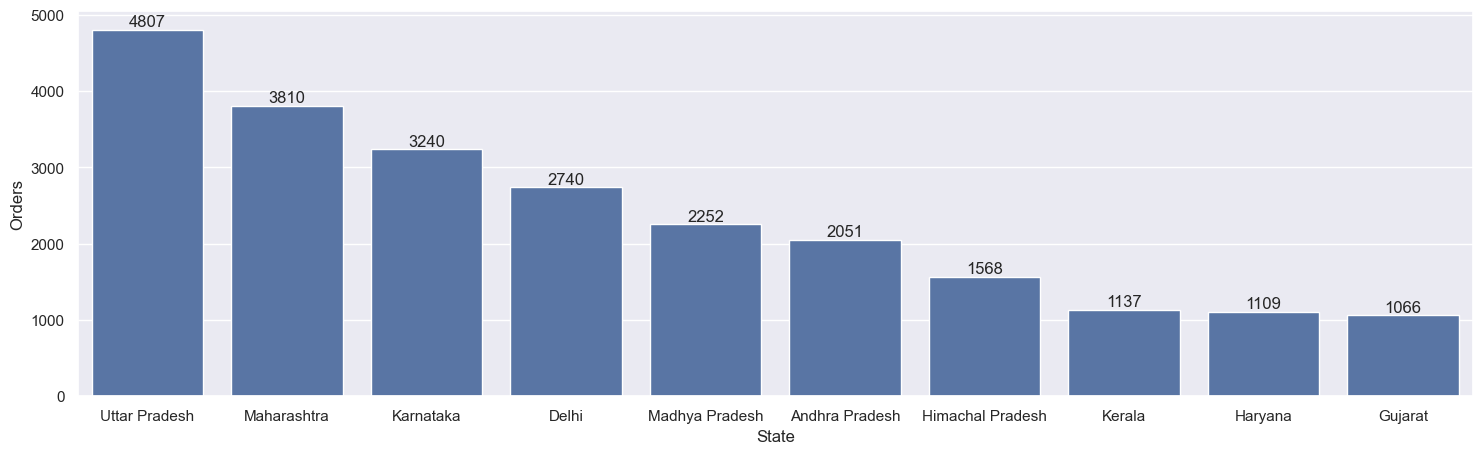

In [47]:
# orders from top 10 states
sales2= df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
e=sns.barplot(data=sales2,x='State',y='Orders')
for bars in e.containers:
    e.bar_label(bars)
    

In [49]:
df.groupby(["State"], as_index = False)['Amount'].sum().sort_values(by="Amount", ascending = False)

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


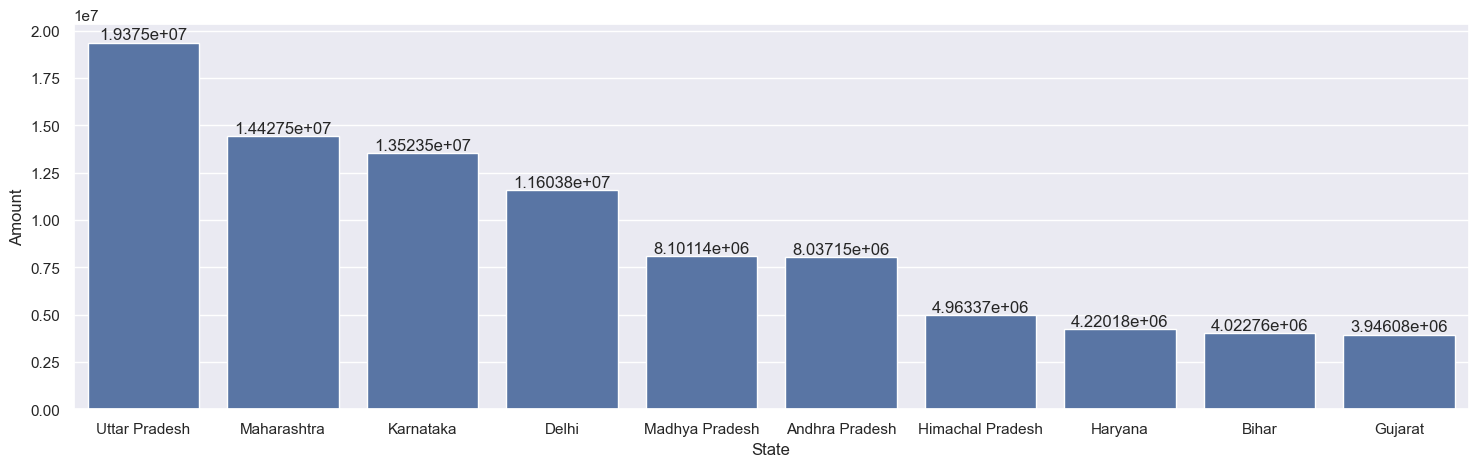

In [48]:
# amount of orders from top 10 states
sales3= df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
f=sns.barplot(data=sales3,x='State',y='Amount')
for bars in f.containers:
    f.bar_label(bars)

#### Marital Status

In [50]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

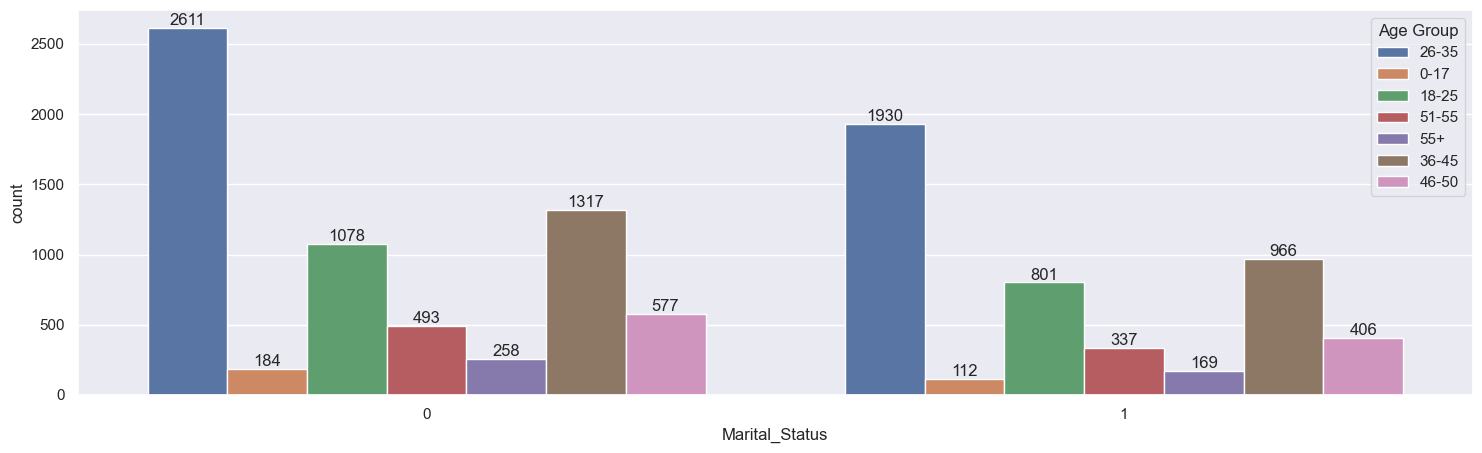

In [51]:
t=sns.countplot(data=df, x= 'Marital_Status',hue='Age Group')
for bars in t.containers:
    t.bar_label(bars)

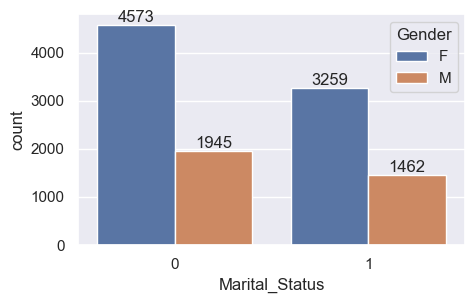

In [53]:
t=sns.countplot(data=df, x= 'Marital_Status',hue='Gender')
sns.set(rc={'figure.figsize':(2,3)})
for bars in t.containers:
    t.bar_label(bars)

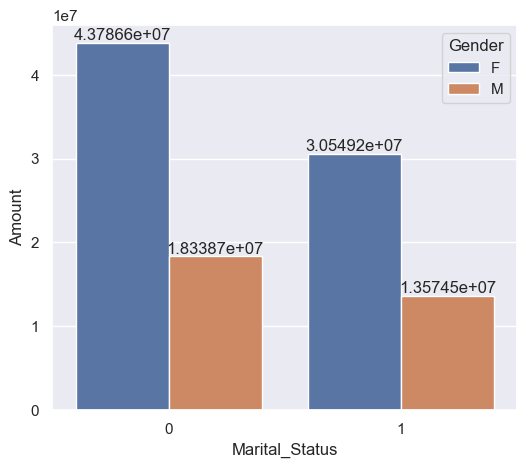

In [57]:
sales4= df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
f=sns.barplot(data=sales4,x='Marital_Status',y='Amount',hue='Gender')
for bars in f.containers:
    f.bar_label(bars)

#### Occupation

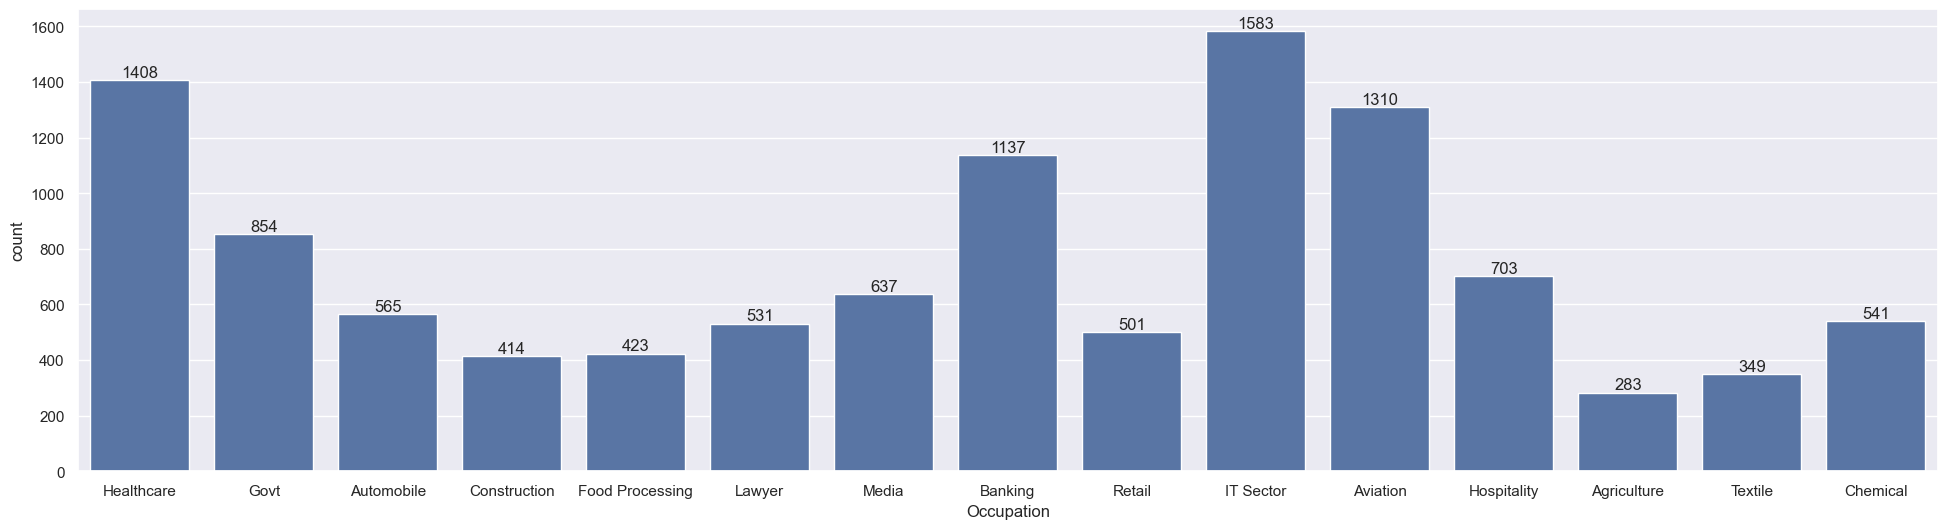

In [66]:
o=sns.countplot(data=df, x= 'Occupation')
sns.set(rc={'figure.figsize':(24,6)})
for bars in o.containers:
    o.bar_label(bars)

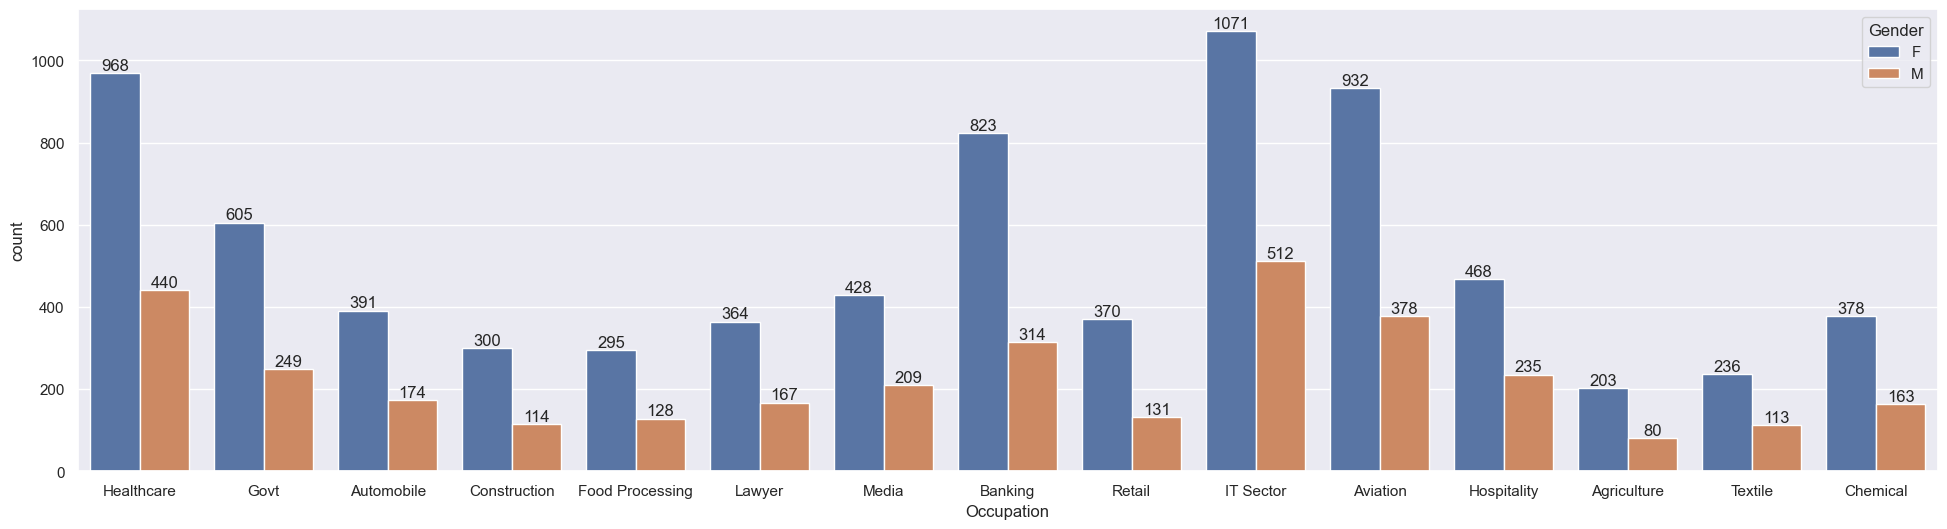

In [67]:
o=sns.countplot(data=df, x= 'Occupation',hue='Gender')
sns.set(rc={'figure.figsize':(24,6)})
for bars in o.containers:
    o.bar_label(bars)

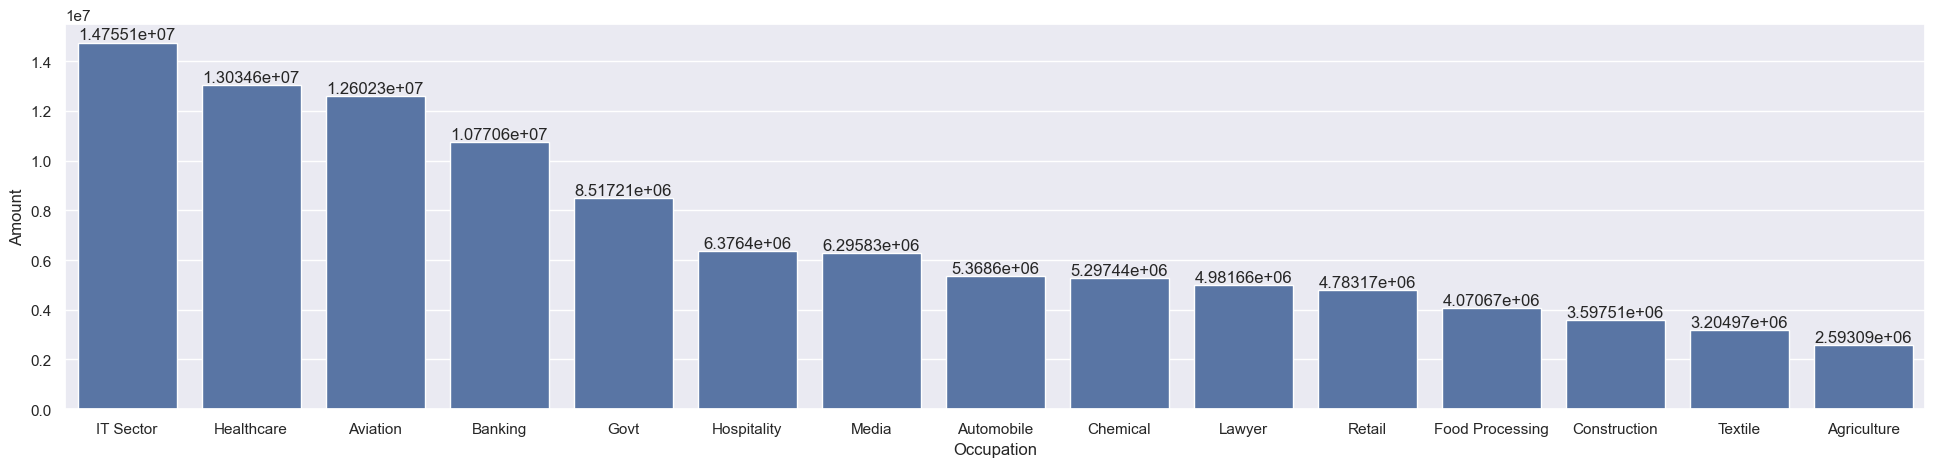

In [69]:
sales5= df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(24,5)})
f=sns.barplot(data=sales5,x='Occupation',y='Amount')
for bars in f.containers:
    f.bar_label(bars)

#### Product Category

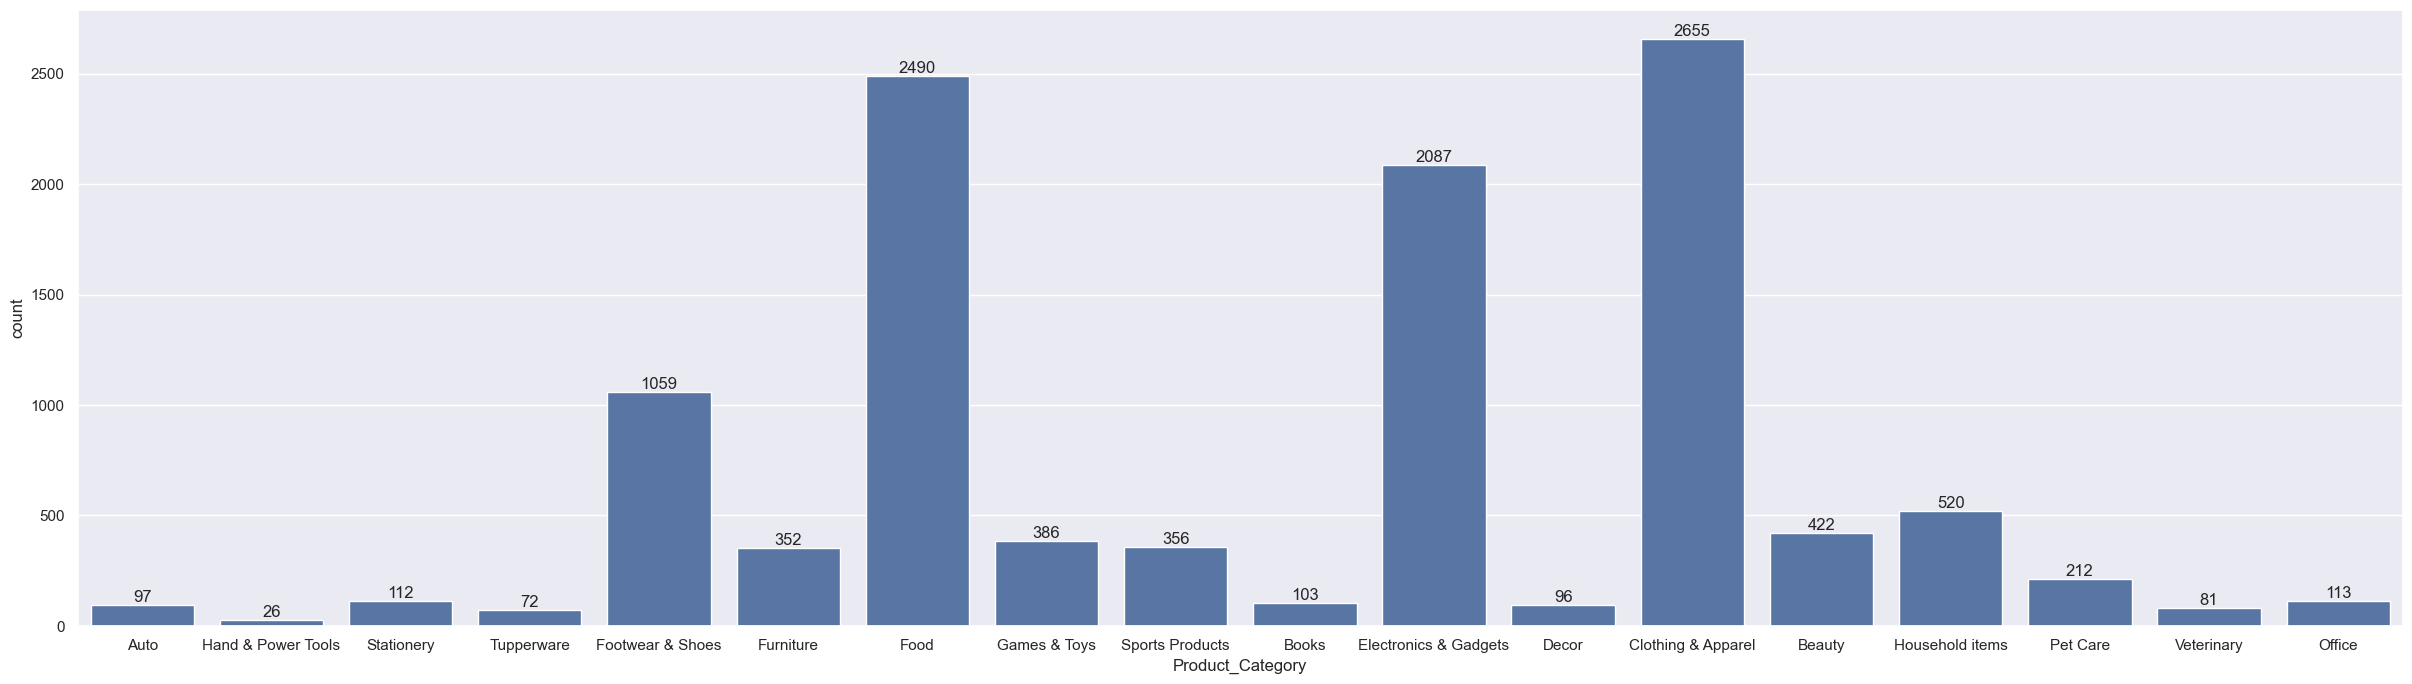

In [75]:
o=sns.countplot(data=df, x= 'Product_Category')
sns.set(rc={'figure.figsize':(30,8)})
for bars in o.containers:
    o.bar_label(bars)

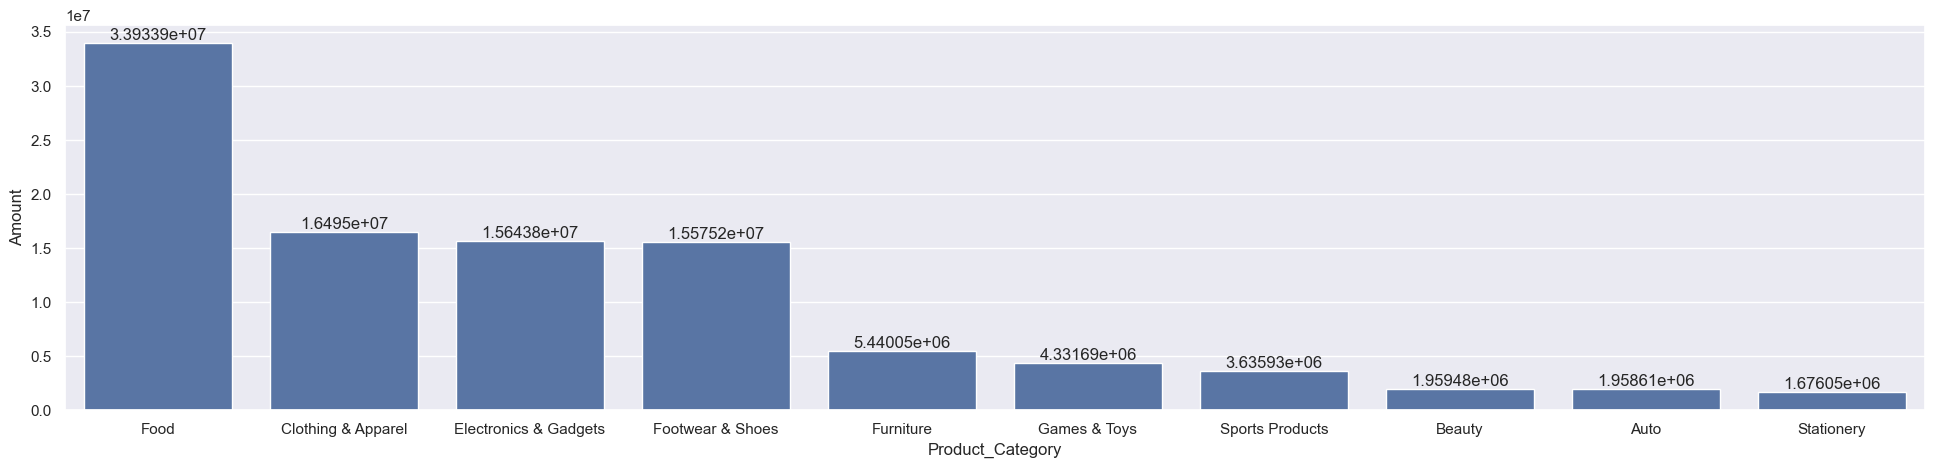

In [78]:
sales6= df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(24,5)})
f=sns.barplot(data=sales6,x='Product_Category',y='Amount')
for bars in f.containers:
    f.bar_label(bars)

In [80]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

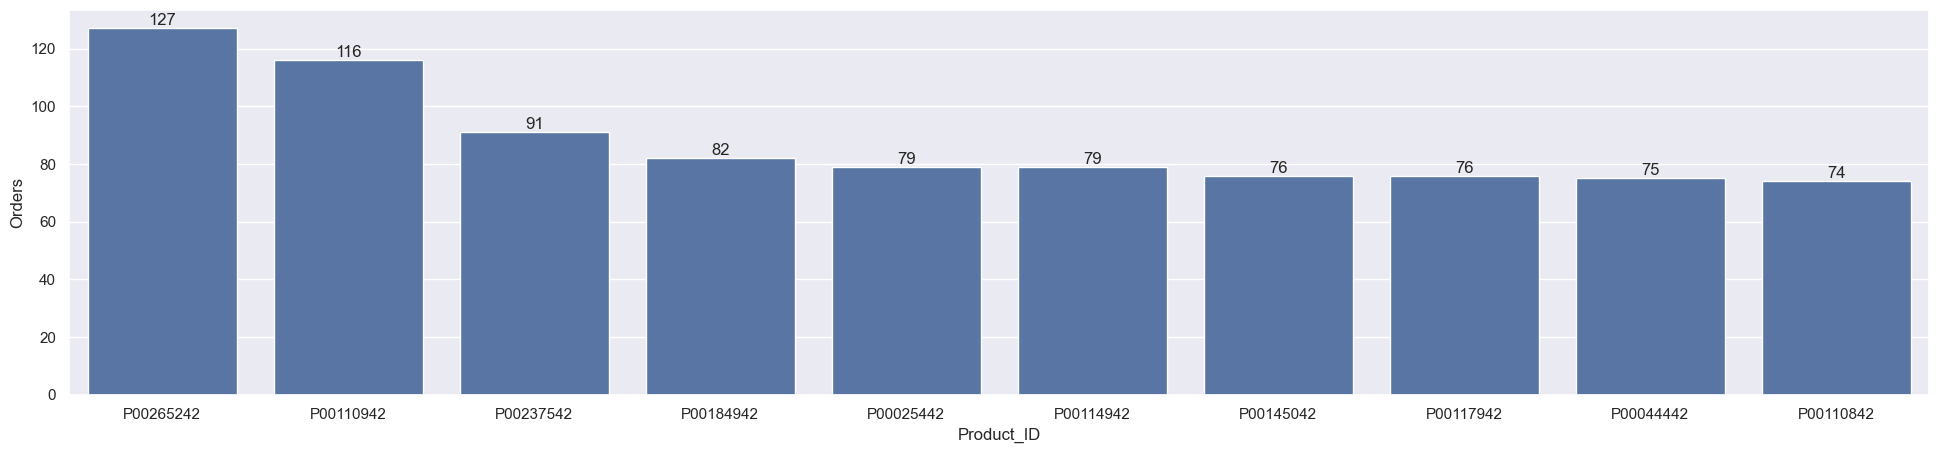

In [81]:
# top 10 most selling products (Product_id and number of orders wise):
sales7= df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(24,5)})
f=sns.barplot(data=sales7,x='Product_ID',y='Orders')
for bars in f.containers:
    f.bar_label(bars)

<Axes: xlabel='Product_ID'>

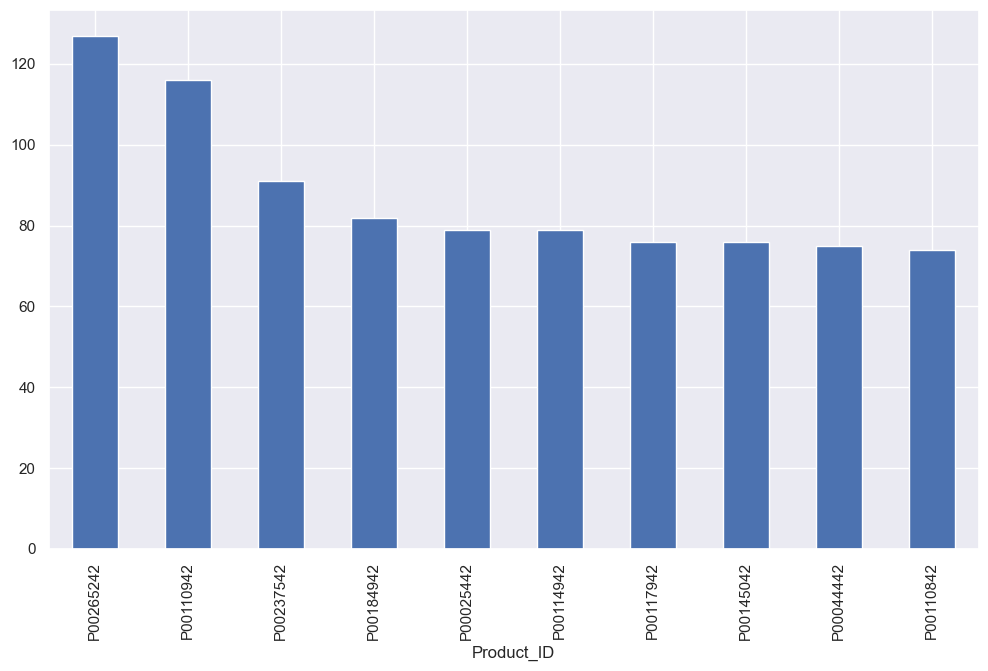

In [82]:
# code for same thing above

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:

: Married females between the age of 26-35 with the occupation in IT sector,healthcare and aviation from Uttar Pradesh,Maharastra and Karnataka 
  are more likly purchase the products from Food, Clothing and Electronic Category.